In [2]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
df = pd.read_csv("income.csv")
df.head()

,Name,Age,Income($)
0,Rob,27,70000
1,Michael,29,90000
2,Mohan,29,61000
3,Ismail,28,60000
4,Kory,42,150000


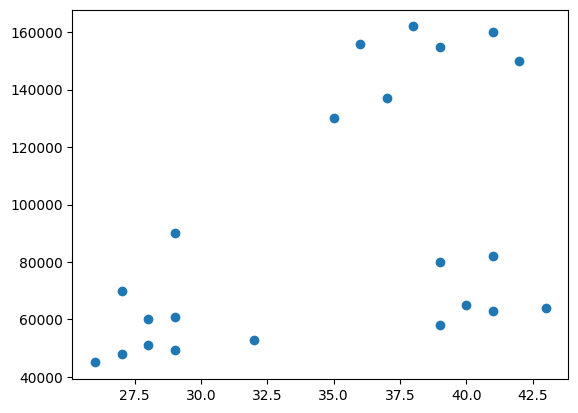

In [6]:
plt.scatter(df["Age"],df["Income($)"])

In [11]:
km =KMeans(n_clusters=3)

In [12]:
y_predicted = km.fit_predict(df[["Age","Income($)"]])
y_predicted

array([1, 1, 2, 2, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 2])

In [13]:
df["cluster"] = y_predicted
df.head()

,Name,Age,Income($),cluster
0,Rob,27,70000,1
1,Michael,29,90000,1
2,Mohan,29,61000,2
3,Ismail,28,60000,2
4,Kory,42,150000,0


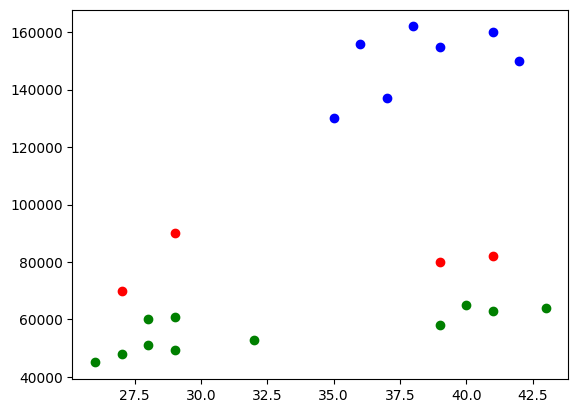

In [14]:
df1= df[df.cluster==0]
df2= df[df.cluster==1]
df3= df[df.cluster==2]
plt.scatter(df1["Age"],df1["Income($)"],color="blue")
plt.scatter(df2["Age"],df2["Income($)"],color="red")
plt.scatter(df3["Age"],df3["Income($)"],color="green")


In [23]:
scaler = MinMaxScaler()
scaler.fit(df[["Income($)"]])
df["Income($)"] =scaler.transform(df[["Income($)"]])
scaler.fit(df[["Age"]])
df["Age"] = scaler.transform(df[["Age"]])
df.head()

,Name,Age,Income($),cluster
0,Rob,0.058824,0.213675,1
1,Michael,0.176471,0.384615,1
2,Mohan,0.176471,0.136752,2
3,Ismail,0.117647,0.128205,2
4,Kory,0.941176,0.897436,0


In [24]:
km =KMeans(n_clusters=3)

In [25]:
y_predicted = km.fit_predict(df[["Age","Income($)"]])
y_predicted

array([0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1])

In [26]:
df["cluster"] = y_predicted
df.head()

,Name,Age,Income($),cluster
0,Rob,0.058824,0.213675,0
1,Michael,0.176471,0.384615,0
2,Mohan,0.176471,0.136752,0
3,Ismail,0.117647,0.128205,0
4,Kory,0.941176,0.897436,2


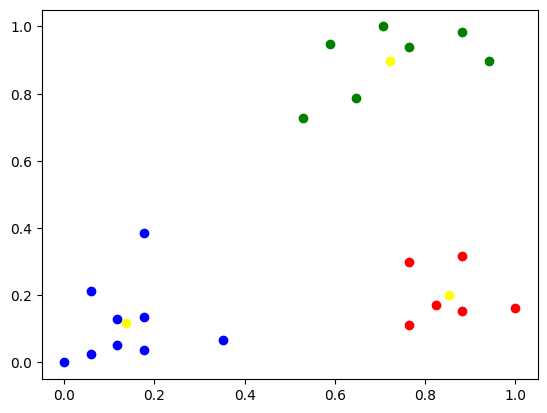

In [29]:
df1= df[df.cluster==0]
df2= df[df.cluster==1]
df3= df[df.cluster==2]
plt.scatter(df1["Age"],df1["Income($)"],color="blue")
plt.scatter(df2["Age"],df2["Income($)"],color="red")
plt.scatter(df3["Age"],df3["Income($)"],color="green")
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color="yellow")


In [28]:
km.cluster_centers_

array([[0.1372549 , 0.11633428],
       [0.85294118, 0.2022792 ],
       [0.72268908, 0.8974359 ]])

In [30]:
k_rng = range(1,10)
sse = []
for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit(df[["Age","Income($)"]])
    sse.append(km.inertia_)

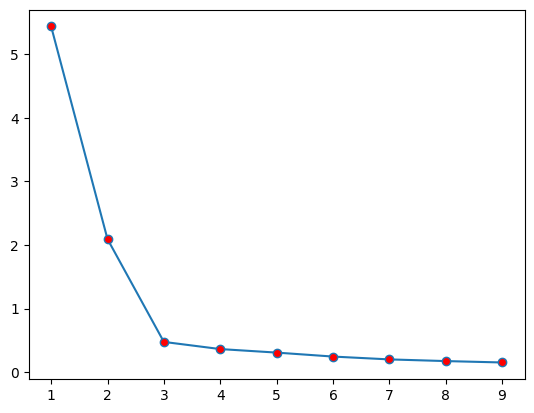

In [38]:
plt.plot(k_rng,sse,marker="o",markerfacecolor="red")